In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/isaac/Documents/Pst&b/Bootcamp/S3/J3/Airplane Crashes and Fatalities upto 2023/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv", encoding="ISO-8859-1")

df.head()


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [7]:
import pandas as pd
import numpy as np

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year


df = df[['Date', 'Year', 'Location', 'Operator', 'Aboard', 'Fatalities', 'Ground']]


df[['Aboard', 'Fatalities', 'Ground']] = df[['Aboard', 'Fatalities', 'Ground']].fillna(0)
df[['Location', 'Operator']] = df[['Location', 'Operator']].fillna('Unknown')


df = df[df['Year'].notna()]


In [8]:

total_crashes = len(df)
total_deaths = df['Fatalities'].sum()
total_aboard = df['Aboard'].sum()
mortality_rate = total_deaths / total_aboard if total_aboard > 0 else 0

print("Total crashes:", total_crashes)
print("Total deaths:", total_deaths)
print("Total aboard:", total_aboard)
print("Global mortality rate:", round(mortality_rate * 100, 2), "%")


crashes_per_year = df['Year'].value_counts().sort_index()


Total crashes: 4998
Total deaths: 111644.0
Total aboard: 155356.0
Global mortality rate: 71.86 %


In [9]:
from scipy import stats


df['Survival Rate'] = 1 - (df['Fatalities'] / df['Aboard'].replace(0, np.nan))

print("Mean Fatalities:", df['Fatalities'].mean())
print("Median Fatalities:", df['Fatalities'].median())
print("STD Fatalities:", df['Fatalities'].std())

print("Mean Survival Rate:", df['Survival Rate'].mean())
print("Median Survival Rate:", df['Survival Rate'].median())
print("STD Survival Rate:", df['Survival Rate'].std())


df['Decade'] = (df['Year'] // 10) * 10
decade_70 = df[df['Decade'] == 1970]['Fatalities']
decade_2000 = df[df['Decade'] == 2000]['Fatalities']

t_stat, p_value = stats.ttest_ind(decade_70, decade_2000, equal_var=False, nan_policy='omit')

print("T-statistic:", t_stat)
print("P-value:", p_value)


Mean Fatalities: 22.337735094037615
Median Fatalities: 11.0
STD Fatalities: 35.04508061393775
Mean Survival Rate: 0.181489019431307
Median Survival Rate: 0.0
STD Survival Rate: 0.31172424924879055
T-statistic: 3.9853719977880306
P-value: 7.175237091088753e-05


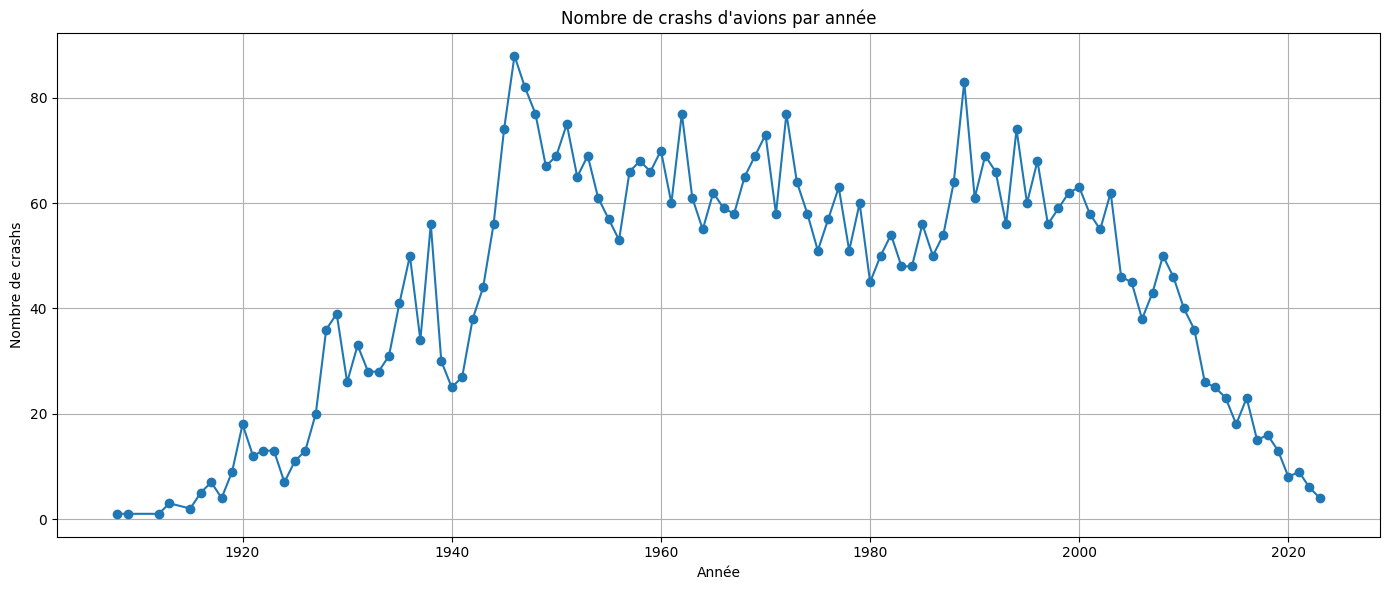

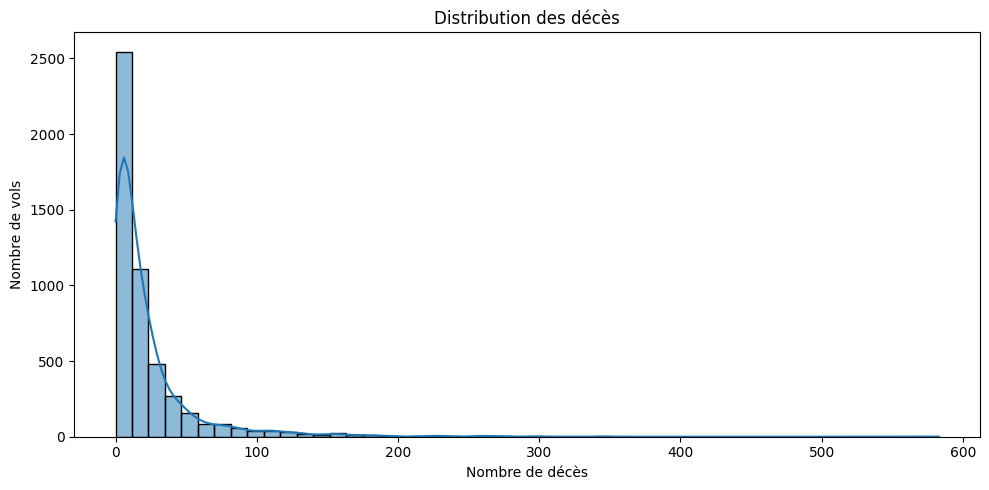

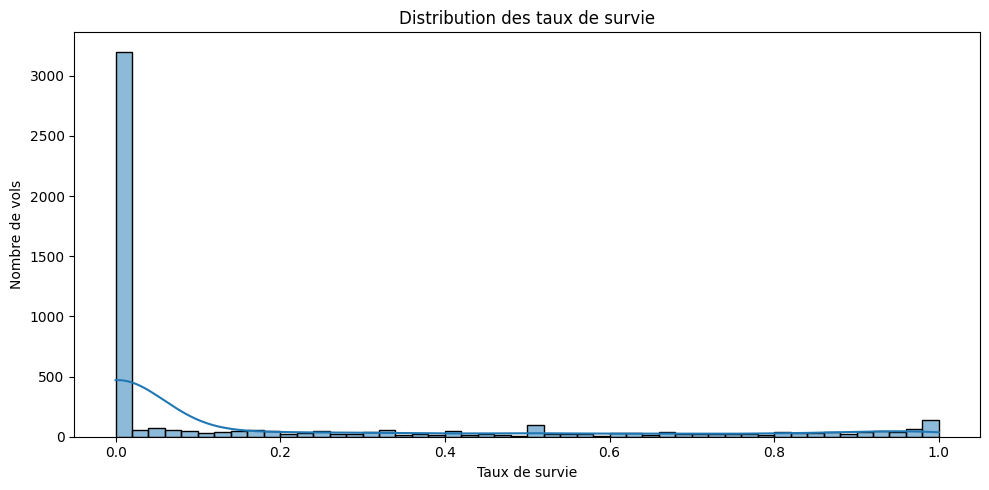

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 6))
plt.plot(crashes_per_year.index, crashes_per_year.values, marker='o')
plt.title("Nombre de crashs d'avions par année")
plt.xlabel("Année")
plt.ylabel("Nombre de crashs")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(df['Fatalities'], bins=50, kde=True)
plt.title("Distribution des décès")
plt.xlabel("Nombre de décès")
plt.ylabel("Nombre de vols")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Survival Rate'].dropna(), bins=50, kde=True)
plt.title("Distribution des taux de survie")
plt.xlabel("Taux de survie")
plt.ylabel("Nombre de vols")
plt.tight_layout()
plt.show()


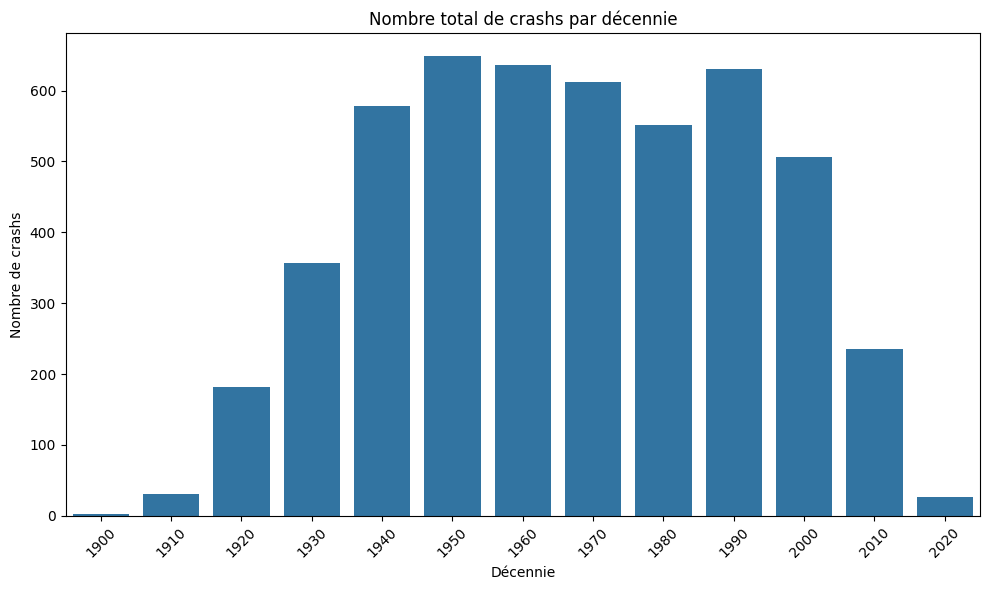

In [11]:
crashes_by_decade = df['Decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=crashes_by_decade.index.astype(int), y=crashes_by_decade.values)
plt.title("Nombre total de crashs par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de crashs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


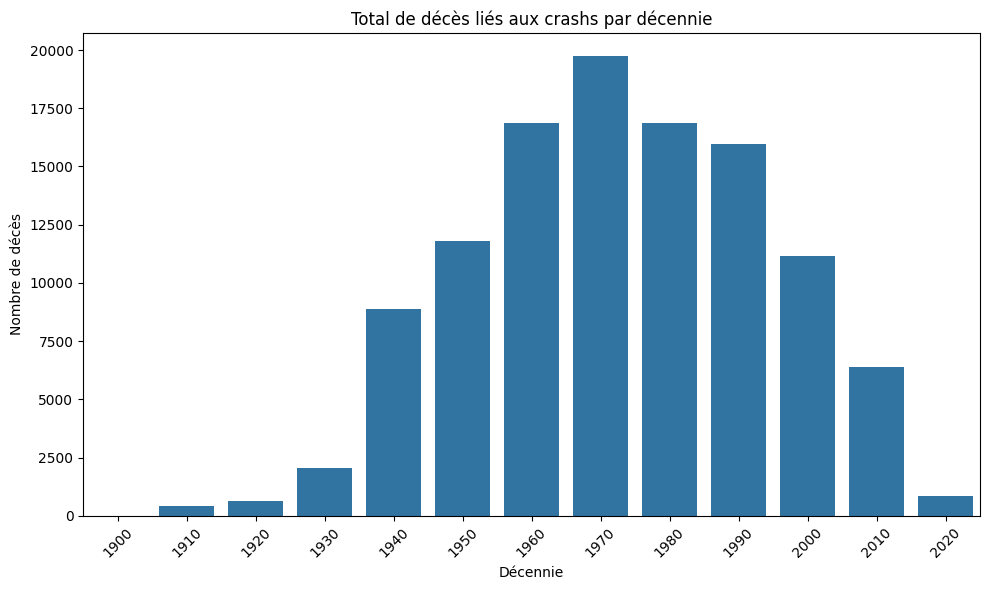

In [12]:
deaths_by_decade = df.groupby('Decade')['Fatalities'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=deaths_by_decade.index.astype(int), y=deaths_by_decade.values)
plt.title("Total de décès liés aux crashs par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de décès")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


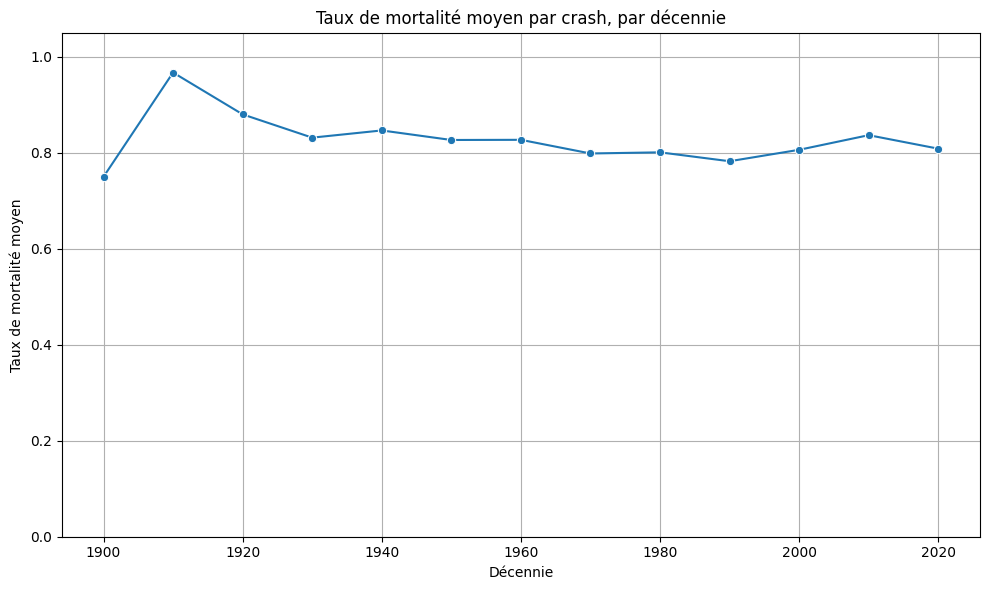

In [13]:
df['Mortality Rate'] = df['Fatalities'] / df['Aboard'].replace(0, np.nan)
mortality_by_decade = df.groupby('Decade')['Mortality Rate'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=mortality_by_decade.index.astype(int), y=mortality_by_decade.values, marker='o')
plt.title("Taux de mortalité moyen par crash, par décennie")
plt.xlabel("Décennie")
plt.ylabel("Taux de mortalité moyen")
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!git add .
!git commit -m "Ajout de l'analyse des crashs d'avions"
!git push origin main